In [1]:
import time
import math

import pyaudio
from nuclear.sublog import log
import numpy as np
import matplotlib.pyplot as plt

from looper.runner.config import Config

In [2]:
config = Config()

In [3]:
silence = np.zeros(config.chunk_size, dtype=np.int16)

In [4]:
sine_frequency = 440
sine_sample_frequency = sine_frequency / config.sampling_rate
sine = np.empty(config.chunk_size, dtype=np.int16)
for i in range(config.chunk_size):
    sine[i] = np.sin(2 * np.pi * sine_sample_frequency * i) * 32767

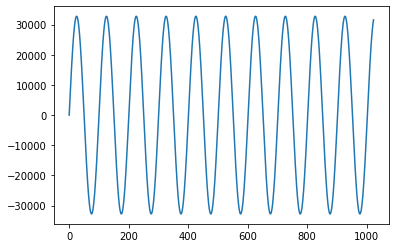

In [5]:
plt.plot(sine)

In [31]:
recordings = np.load('../out/latency.rec.npy')

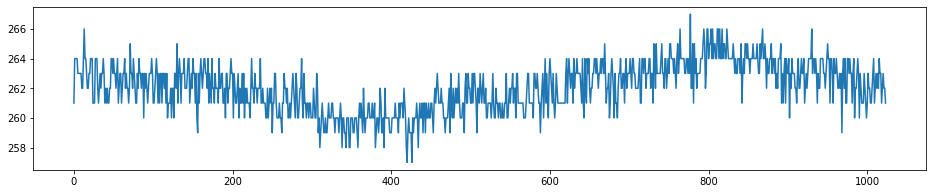

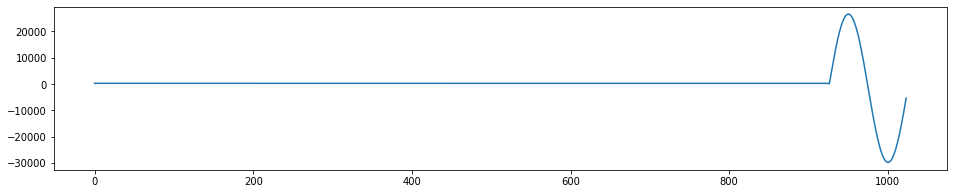

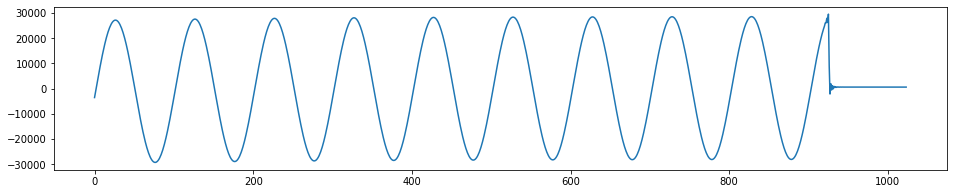

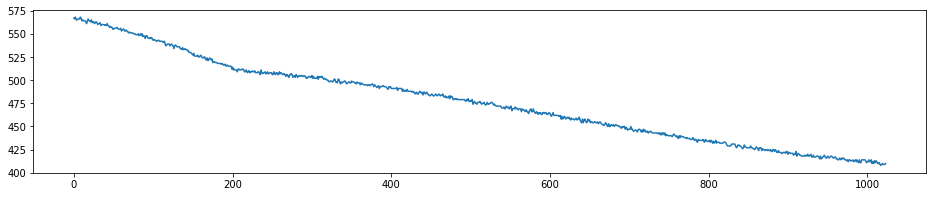

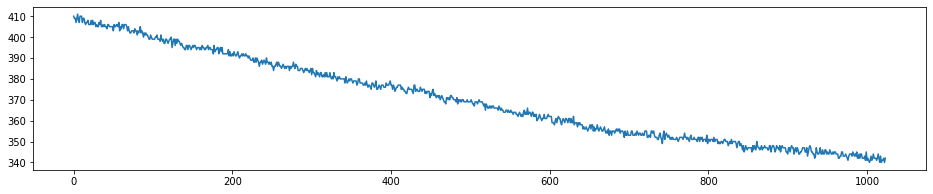

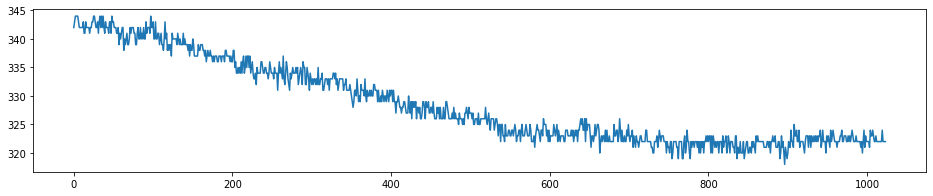

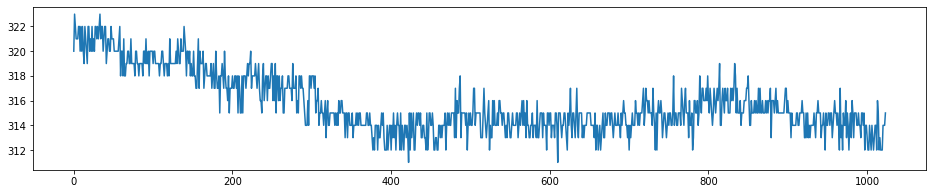

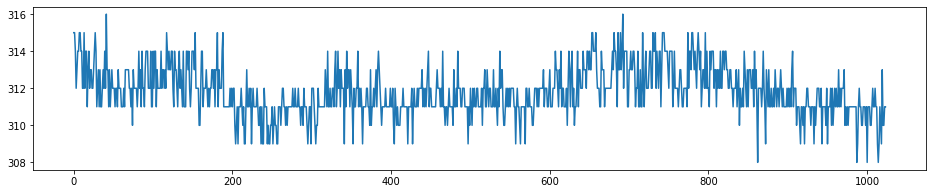

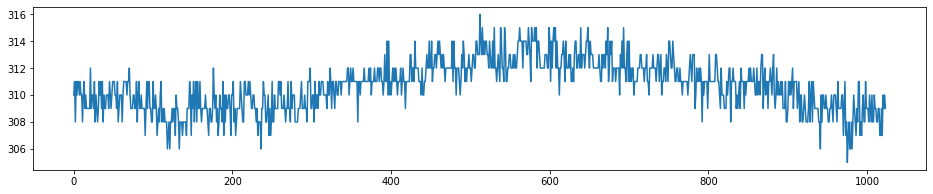

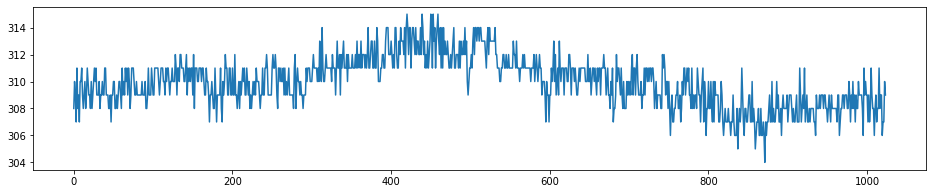

In [32]:
# All chunks plotted separately
plt.rcParams['figure.figsize'] = [16, 3]
for i in range(len(recordings)):
    recording = recordings[i]
    plt.plot(recording)
    plt.show()

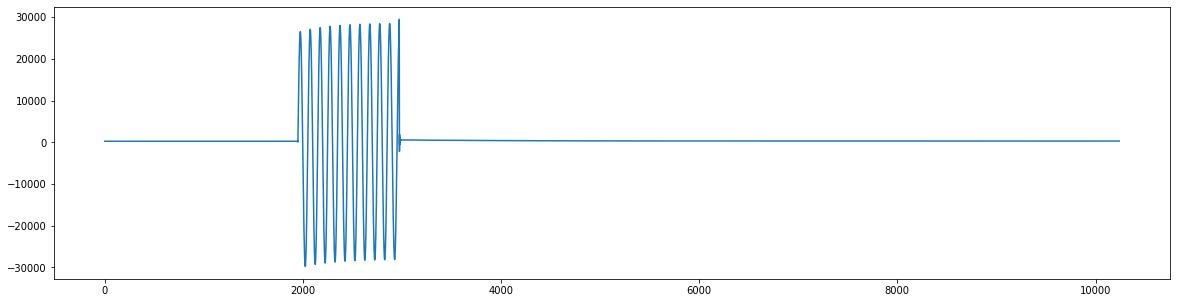

In [33]:
plt.rcParams['figure.figsize'] = [20, 5]
joined = np.concatenate(recordings)
plt.plot(joined)
plt.show()

In [34]:
amplitude = 32767
threshold_amp = amplitude / 2
clip_start = np.argmax(joined>threshold_amp)
clip_start

1961

In [35]:
max_amplitude = max(np.max(joined), -np.min(joined))
max_amplitude

29763

In [36]:
latency_chunks = math.ceil(clip_start / config.chunk_size)
latency_chunks

2

In [38]:
chunk_length_ms = 1000 * config.chunk_size / config.sampling_rate
chunk_length_ms

23.219954648526077

In [39]:
sample_time_s = 1 / config.sampling_rate

In [40]:
latency_ms = clip_start * sample_time_s * 1000
latency_ms

44.467120181405896

In [41]:
# latency based on minimum number of recorded chunks
latency_max_ms = latency_chunks * config.chunk_size * sample_time_s * 1000
latency_max_ms

46.439909297052154